## Land Use Data Cleaning - Region de Maule 
2009 and 2016 data files
Data originated from CONAF SIT website (link)
https://sit.conaf.cl/ -> Descarga Catastro Recursos Vegetacionales por Región
Cleaning process of column names and contents, generating training datasets for classification model


Classification Steps

1. Build
var training = image/Sample(region, scale)
2. Train 
var classifier = ee.Classifier.cart().train(training)
3. Apply
var map = image.classify(classifier)
4. Assess 
var confusionMatrix = classifier.confusionMatrix()
var accuracy = confusionMatrix.accuracy()

## 2016 Data Cleaning

In [2]:
import geopandas as gpd

# Define the path to shape file
shapefile_path = "07_regi_n_del_maule_actualizaci_n_2016/07_regi_n_del_maule_actualizaci_n_2016.shp"

# Load the shapefile as Geo Data Frame
gdf = gpd.read_file(shapefile_path)

# Preview the first few rows
print(gdf.head())

# Check the coordinate reference system (CRS)
print("CRS:", gdf.crs)

# Get the basic metadata
print("Number of features:", len(gdf))
print("Geometry type:", gdf.geom_type.unique())

        ID ID_USO ID_SUBUSO ID_ESTRUC ID_COBER ID_ALTU ID_TIFO ID_STIF  \
0  20564.0     04        02        02       01       J      11      06   
1  20565.0     03        01        04       00     NaN     NaN     NaN   
2  20566.0     04        02        02       01       J      11      06   
3  20568.0     03        04        00       01     NaN     NaN     NaN   
4  20569.0     02        01       NaN      NaN     NaN     NaN     NaN   

  ID_ESP1 ID_ESP2  ... COOR_NORTE NOM_SNASPE TIPO_SNASP            NOM_REG  \
0      LC      Rm  ...        0.0        NaN        NaN  RegiÃ³n del Maule   
1      hl     NaN  ...        0.0        NaN        NaN  RegiÃ³n del Maule   
2      LC      Cf  ...        0.0        NaN        NaN  RegiÃ³n del Maule   
3      Ce      MB  ...        0.0        NaN        NaN  RegiÃ³n del Maule   
4     NaN     NaN  ...        0.0        NaN        NaN  RegiÃ³n del Maule   

  NOM_PROV NOM_COM   TC TIPO_POLI SUPERF_HA  \
0  Linares  Parral   14        03     2

In [87]:
# Check the contents of SUBUSO column - see there is some cleaning to be done
gdf['SUBUSO'].value_counts()

SUBUSO
PlantaciÃ³n                                                                                                            37536
Bosque Nativo                                                                                                          30783
Matorral                                                                                                               12454
Matorral Arborescente                                                                                                  10290
RotaciÃ³n Cultivo-Pradera                                                                                               4898
Terreno de Uso AgrÃ­cola                                                                                                4463
Praderas                                                                                                                4410
Matorral-Pradera                                                                                                      

In [4]:
# SUBUSO COLUMN CLEAN-UP
# Print unique SUBUSO values before cleaning
print("Before Cleaning:", gdf['SUBUSO'].unique())

# Define a dictionary to fix common encoding issues
fix_mapping = {
    "PlantaciÃ³n": "Plantación",
    "MinerÃ­a Industrial": "Minería Industrial",
    "Terreno de Uso AgrÃ­cola": "Terreno de Uso Agrícola",
    "VegetaciÃ³n HerbÃ¡cea en Orillas de RÃ­os": "Vegetación Herbácea en Orillas de Ríos",
    "Cajas de RÃ­os": "Cajas de Ríos",
    "RÃ­os": "Ríos",
    "Nieves": "Nieves",
}

# Apply manual fixes
gdf['SUBUSO'] = gdf['SUBUSO'].replace(fix_mapping)

# Print unique SUBUSO values after fixing encoding
print("After Encoding Fix:", gdf['SUBUSO'].unique())

# Remove corrupted/invalid categories
invalid_values = [
    "b'54657272656e6f20736f62726520656c204cc383c2ad6d69746520416c7469747564696e616c206465206c61205665676574616369c383c2'"
]

gdf = gdf[~gdf['SUBUSO'].isin(invalid_values)]

# Define valid categories to keep
valid_categories = [
    "Plantación", "Bosque Nativo", "Matorral", "Matorral Arborescente",
    "Rotación Cultivo-Pradera", "Terreno de Uso Agrícola", "Praderas",
    "Matorral-Pradera", "Bosque Mixto", "Ríos", "Ciudades, Pueblos, Zonas Industriales",
    "Cajas de Ríos", "Afloramientos Rocosos", "Lagos, Lagunas, Embalses, Tranques",
    "Otros sin Vegetación", "Otros Terrenos Húmedos", "Nieves", "Minería Industrial",
    "Playas y Dunas", "Derrumbe sin Vegetación", "Vegas", "Vegetación Herbácea en Orillas de Ríos",
    "Corridas de Lavas y Escoriales", "Matorral con Suculentas"
]

# Ensure "Plantación" is included in the filter
if "Plantación" not in valid_categories:
    valid_categories.append("Plantación")

# Filter dataset to keep only valid categories
gdf = gdf[gdf['SUBUSO'].isin(valid_categories)]

# Print final unique SUBUSO values
print("Final Cleaned Categories:", gdf['SUBUSO'].unique())

# Save cleaned data if needed
#gdf.to_file("cleaned_shapefile.shp")

Before Cleaning: ['Bosque Nativo' 'Praderas' 'Matorral Arborescente'
 'Terreno de Uso AgrÃ\xadcola' 'Lagos, Lagunas, Embalses, Tranques'
 'PlantaciÃ³n' 'Matorral-Pradera' 'Matorral' 'RotaciÃ³n Cultivo-Pradera'
 'Ciudades, Pueblos, Zonas Industriales' 'Cajas de RÃ\xados'
 'Bosque Mixto' 'RÃ\xados' 'Otros Terrenos HÃºmedos'
 'MinerÃ\xada Industrial' 'VegetaciÃ³n HerbÃ¡cea en Orillas de RÃ\xados'
 'Playas y Dunas' 'Otros sin VegetaciÃ³n' 'Vegas'
 b'54657272656e6f20736f62726520656c204cc383c2ad6d69746520416c7469747564696e616c206465206c61205665676574616369c383c2'
 'Nieves' 'Afloramientos Rocosos' 'Derrumbe sin VegetaciÃ³n'
 'Corridas de Lavas y Escoriales' 'Matorral con Suculentas']
After Encoding Fix: ['Bosque Nativo' 'Praderas' 'Matorral Arborescente'
 'Terreno de Uso Agrícola' 'Lagos, Lagunas, Embalses, Tranques'
 'Plantación' 'Matorral-Pradera' 'Matorral' 'RotaciÃ³n Cultivo-Pradera'
 'Ciudades, Pueblos, Zonas Industriales' 'Cajas de Ríos' 'Bosque Mixto'
 'Ríos' 'Otros Terrenos HÃºmedos' 

In [5]:
# USO COLUMN CLEANING

# Define a function to fix encoding issues
def fix_encoding(text):
    if isinstance(text, bytes):  # Handle byte strings
        text = text.decode('utf-8', 'ignore')
    return text.encode('latin1', 'ignore').decode('utf-8', 'ignore') if isinstance(text, str) else text



# Fix encoding issues in the "USO" column
gdf['USO'] = gdf['USO'].apply(fix_encoding)

# Define a dictionary to manually fix known issues
uso_fix_mapping = {
    "Terrenos AgrÃ­colas": "Terrenos Agrícolas",
    "Ã­reas Desprovistas de VegetaciÃ": "Áreas Desprovistas de Vegetación",
    "Ãreas Urbanas e Industriales": "Áreas Urbanas e Industriales",
    "Nieves Eternas y Glaciares": "Nieves Eternas y Glaciares",
    "Humedales": "Humedales"
}

# Apply the manual fixes
gdf['USO'] = gdf['USO'].replace(uso_fix_mapping)

# Check the unique values in the "USO" column after cleaning
print(gdf['USO'].value_counts())

# If you need to filter out some values, you can define the valid categories
valid_uso_categories = [
    "Bosques", "Praderas y Matorrales", "Terrenos Agrícolas", 
    "Áreas Desprovistas de Vegetación", "Cuerpos de Agua", 
    "Áreas Urbanas e Industriales", "Nieves Eternas y Glaciares", "Humedales"
]

# Filter to keep only valid categories in "USO"
gdf = gdf[gdf['USO'].isin(valid_uso_categories)]

# Display cleaned data
print(gdf['USO'].value_counts())
#gdf.to_file("cleaned_shapefile.shp")

USO
Bosques                           70669
Praderas y Matorrales             30115
Terrenos Agrícolas                 4463
Áreas Desprovistas de Vegetaci     2329
Cuerpos de Agua                    2247
Áreas Urbanas e Industriales       1554
Nieves Eternas y Glaciares          129
Humedales                            82
Name: count, dtype: int64
USO
Bosques                         70669
Praderas y Matorrales           30115
Terrenos Agrícolas               4463
Cuerpos de Agua                  2247
Áreas Urbanas e Industriales     1554
Nieves Eternas y Glaciares        129
Humedales                          82
Name: count, dtype: int64


In [8]:
# SPECIES COLUMN CLEANING

# Fixe species type names 
# 
encoding_fixes = {
    'Ã¡': 'á', 'Ã­': 'í', 'Ã³': 'ó', 'Ã©': 'é', 'Ãº': 'ú',
    'Ã±': 'ñ', 'Ã‰': 'É', 'Ãš': 'Ú', 'Ã': 'Í', 'Ã‘': 'Ñ',
    'Ã´': 'ô', 'Ã¶': 'ö', 'Ã': 'Ç', 'Ã²': 'ò', 'Ã³': 'ó'
}

columns_to_clean = ['ESPECI2_CO', 'ESPECI3_CO', 'ESPECI4_CO', 'ESPECI5_CO', 'ESPECI6_CO']

# Clean each column in the list
for col in columns_to_clean:
    gdf[col] = gdf[col].fillna('')  # Replace NaN with empty string
    gdf[col] = gdf[col].replace(encoding_fixes, regex=True)  # Fix encoding issues
    gdf[col] = gdf[col].str.strip()  # Remove leading/trailing spaces

# Check unique values for each cleaned column
for col in columns_to_clean:
    print(f"Unique values for {col}:")
    print(gdf[col].unique())
    print()

Unique values for ESPECI2_CO:
['Romerillo' '' 'Colliguay' 'Maitén' 'Espino' 'Boldo' 'Pino insigne'
 'Aromo' 'Maqui' 'Zarzamora' 'Sauce llorón' 'Hualo' 'Falsa acacia'
 'Rosa mosqueta' 'Litre' 'Hierba del chancho' 'Ã\x81lamo' 'Pasto miel'
 'Sauce mimbre' 'Peumo' 'Bollén' 'Pichi' 'Eucalipto' 'Chequén' 'Culén'
 'Quillay' 'Chilca' 'Patagua' 'Huingán' 'Galega' 'Madroño' 'Vinagrillo'
 'Chin chin' 'Tralhuén' 'Pitra' 'Canelo' 'Teline' 'Quila' 'Sauce amargo'
 'Huañil' 'Avena' 'Totora' 'Tebo' 'Roble' 'Arrayán' 'Ruil' 'Coihue'
 'Retamilla' 'Olivillo' 'Avellano' 'Radal' 'Grama salada' 'Litrecillo'
 'Chepica del sur' 'Mayo' 'Cardo' 'Arrayán macho' 'Oreganillo' 'Crucero'
 'Colihue' 'Arvejilla' 'Tihuén' 'Tiaca' 'Pasto piojillo' 'Ã\x91irre'
 'Murtilla' 'Ciprés de la cordillera' 'Hierba blanca' 'Quinchamalí'
 'Duraznillo' 'Lingue' 'Acacia' 'Pegajoso' 'Quila chica' 'Arce' 'Molle'
 'Michay' 'Hierba del paño' 'Laurel' 'Avellanillo' 'Raulí'
 'Mañio de hojas largas' 'Cadilla' 'Pingo pingo' 'Zarcilla'
 'Roble

In [57]:
### CLEAN FOREST TYPE COLUMNS
gdf['TIPO_FORES'] = (
    gdf['TIPO_FORES']
    .str.replace('Ã³', 'ó')
    .str.replace('Ã­', 'í')
    .str.replace('Ã©', 'é')
    .str.replace('Ãº', 'ú')
    .str.replace('Ã±', 'ñ')
    .str.replace('Ã¡', 'á')
    .str.replace('CiprÃ©s', 'Ciprés')
)

print(gdf['TIPO_FORES'].value_counts())


gdf['SUBTIPOFOR'] = (
    gdf['SUBTIPOFOR']
    .str.replace('Ã³', 'ó')
    .str.replace('Ã­', 'í')
    .str.replace('Ã©', 'é')
    .str.replace('Ãº', 'ú')
    .str.replace('Ã±', 'ñ')
    .str.replace('Ã¡', 'á')
    .str.replace('CiprÃ©s', 'Ciprés')
)
gdf['SUBTIPOFOR'] = gdf['SUBTIPOFOR'].str.replace('Ã', 'Ñ')

print(gdf['SUBTIPOFOR'].value_counts())

TIPO_FORES
Esclerófilo                16334
Roble-Raulí-Coihue          6720
Roble-Hualo                 6714
Lenga                        558
Ciprés de la Cordillera      457
Name: count, dtype: int64
SUBTIPOFOR
Peumo-Quillay-Litre        12170
Roble-Hualo                 6702
Roble                       6240
Esclerófilo                 2705
Espino                      1453
Ñirre                        545
Ciprés de la Cordillera      457
Coihue                       362
Roble-Raulí-Coihue           118
Roble del Norte               12
Lenga                          8
Belloto o Lingue               6
Lenga-Coihue Común             5
Name: count, dtype: int64


In [58]:
# SAVE FINAL CLEAN FILE
gdf.to_file("2016_LandUse_ML_Clean.shp")

## 2009 Data Cleaning

In [11]:
# Define the path to shape file
shapefile_path = "07__regi_n_del_maule_2009/07__regi_n_del_maule_2009.shp"

# Load the shapefile as Geo Data Frame
gdf = gpd.read_file(shapefile_path)

# Preview the first few rows
print(gdf.head())

# Check the coordinate reference system (CRS)
print("CRS:", gdf.crs)

# Get the basic metadata
print("Number of features:", len(gdf))
print("Geometry type:", gdf.geom_type.unique())

   ID_UNICO CARTA_IGM ID_ALTU ID_USO ID_SUBUSO ID_ESTRUC ID_COBER ID_TIFO  \
0       1.0      F056     NaN     02        01        00       00      00   
1       2.0      F056     NaN     02        01        00       00      00   
2       3.0      F056     NaN     03        03        00       02      00   
3       4.0      F056     NaN     03        03        00       03      00   
4      22.0      F056     NaN     04        01        02       00      00   

  ID_STIF  ID_REGI  ...  ESPECIE_4     ESPECIE_5 ESPECIE_6 SNASPE NOMBRE  \
0      00        7  ...        NaN           NaN       NaN    NaN    NaN   
1      00        7  ...        NaN           NaN       NaN    NaN    NaN   
2      00        7  ...      Hualo           NaN       NaN    NaN    NaN   
3      00        7  ...    Quillay  Pino insigne       NaN    NaN    NaN   
4      00        7  ...        NaN           NaN       NaN    NaN    NaN   

   PROVINCIA     COMUNA TIPO_SNAS SUPERF_HA  \
0  Cauquenes  Cauquenes       NaN

In [48]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
gdf.head(5)  # Display the first 5 rows
pd.reset_option('display.max_columns') 

,ID_UNICO,CARTA_IGM,ID_ALTU,ID_USO,ID_SUBUSO,ID_ESTRUC,ID_COBER,ID_TIFO,ID_STIF,ID_REGI,ID_PROV,ID_COMU,ID_ESP1,ID_ESP2,ID_ESP3,ID_ESP4,ID_ESP5,ID_ESP6,ALTURA,USOS_2009,TIPO_FORES,SUBTIPOFOR,ESPECIE_1,ESPECIE_2,ESPECIE_3,ESPECIE_4,ESPECIE_5,ESPECIE_6,SNASPE,NOMBRE,PROVINCIA,COMUNA,TIPO_SNAS,SUPERF_HA,geometry
0,1.0,F056,NaN,02,01,00,00,00,00,7,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TERRENOS DE USO AGRICOLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cauquenes,Cauquenes,NaN,2.7,"POLYGON ((748242.032 6044586.200, 748243.200 6..."
1,2.0,F056,NaN,02,01,00,00,00,00,7,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TERRENOS DE USO AGRICOLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cauquenes,Cauquenes,NaN,0.5,"POLYGON ((748373.012 6044006.925, 748324.122 6..."
2,3.0,F056,NaN,03,03,00,02,00,00,7,2,1,LC,QS,PB,NG,NaN,NaN,NaN,MATORRAL SEMIDENSO,NaN,NaN,Litre,Quillay,Boldo,Hualo,NaN,NaN,NaN,NaN,Cauquenes,Cauquenes,NaN,2.0,"POLYGON ((744707.968 6040334.249, 744481.726 6..."
3,4.0,F056,NaN,03,03,00,03,00,00,7,2,1,LC,Rm,EP,QS,PR,NaN,NaN,MATORRAL ABIERTO,NaN,NaN,Litre,Romerillo,Escallonia pulverulenta,Quillay,Pino insigne,NaN,NaN,NaN,Cauquenes,Cauquenes,NaN,384.4,"POLYGON ((746336.422 6043074.721, 746369.020 6..."
4,22.0,F056,NaN,04,01,02,00,00,00,7,2,1,PR,NaN,NaN,NaN,NaN,NaN,NaN,PLANTACION JOVEN O RECIEN COSECHADA,NaN,NaN,Pino insigne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cauquenes,Cauquenes,NaN,44.3,"POLYGON ((747085.632 6045929.748, 747089.822 6..."


In [18]:
# COmpare to columns for 2016 data
gdf_2016 = gpd.read_file("07_regi_n_del_maule_actualizaci_n_2016/2016_LandUse_ML_Clean.shp")

In [59]:
print(gdf.columns)
print(gdf_2016.columns)

Index(['ID_UNICO', 'CARTA_IGM', 'ID_ALTU', 'ID_USO', 'ID_SUBUSO', 'ID_ESTRUC',
       'ID_COBER', 'ID_TIFO', 'ID_STIF', 'ID_REGI', 'ID_PROV', 'ID_COMU',
       'ID_ESP1', 'ID_ESP2', 'ID_ESP3', 'ID_ESP4', 'ID_ESP5', 'ID_ESP6',
       'ALTURA', 'USOS_2009', 'TIPO_FORES', 'SUBTIPOFOR', 'ESPECIE_1',
       'ESPECIE_2', 'ESPECIE_3', 'ESPECIE_4', 'ESPECIE_5', 'ESPECIE_6',
       'SNASPE', 'NOMBRE', 'PROVINCIA', 'COMUNA', 'TIPO_SNAS', 'SUPERF_HA',
       'geometry'],
      dtype='object')
Index(['ID', 'ID_USO', 'ID_SUBUSO', 'ID_ESTRUC', 'ID_COBER', 'ID_ALTU',
       'ID_TIFO', 'ID_STIF', 'ID_ESP1', 'ID_ESP2', 'ID_ESP3', 'ID_ESP4',
       'ID_ESP5', 'ID_ESP6', 'ORG_ESP_CC', 'ID_ESP_CC1', 'ID_ESP_CC2',
       'CODREG', 'CODPROV', 'CODCOM', 'USO_TIERRA', 'USO', 'SUBUSO',
       'ESTRUCTURA', 'COBERTURA', 'ALTURA', 'TIPO_FORES', 'SUBTIPOFOR',
       'ESPECI1_CI', 'ESPECI2_CI', 'ESPECI3_CI', 'ESPECI4_CI', 'ESPECI5_CI',
       'ESPECI6_CI', 'ESPECI1_CO', 'ESPECI2_CO', 'ESPECI3_CO', 'ESPECI4_CO',
  

In [66]:
# Create mapping from ID to uso / subuso to match 2016
uso_map = gdf_2016[['ID_USO','ID_SUBUSO','USO','SUBUSO']].value_counts().reset_index(name='count').sort_values(by=['ID_USO','ID_SUBUSO'])

In [67]:
# Merge 2009 data with id mapping table
gdf = gdf.merge(uso_map[['ID_USO', 'ID_SUBUSO', 'USO', 'SUBUSO']], 
                on=['ID_USO', 'ID_SUBUSO'], 
                how='left')

# Check if the columns were added correctly
print(gdf.head())

   ID_UNICO CARTA_IGM ID_ALTU ID_USO ID_SUBUSO ID_ESTRUC ID_COBER ID_TIFO  \
0       1.0      F056     NaN     02        01        00       00      00   
1       2.0      F056     NaN     02        01        00       00      00   
2       3.0      F056     NaN     03        03        00       02      00   
3       4.0      F056     NaN     03        03        00       03      00   
4      22.0      F056     NaN     04        01        02       00      00   

  ID_STIF  ID_REGI  ID_PROV  ID_COMU ID_ESP1 ID_ESP2 ID_ESP3 ID_ESP4 ID_ESP5  \
0      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
1      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
2      00        7        2        1      LC      QS      PB      NG     NaN   
3      00        7        2        1      LC      Rm      EP      QS      PR   
4      00        7        2        1      PR     NaN     NaN     NaN     NaN   

  ID_ESP6 ALTURA                            USOS_2009 TI

In [35]:
gdf_2016[['ID_SUBUSO','SUBUSO']].value_counts()

ID_SUBUSO  SUBUSO                                
01         Plantación                                37536
02         Bosque Nativo                             30783
03         Matorral                                  12454
04         Matorral Arborescente                     10290
01         Terreno de Uso Agrícola                    4463
           Praderas                                   4410
02         Matorral-Pradera                           2957
03         Bosque Mixto                               2350
02         Ríos                                       1617
01         Ciudades, Pueblos, Zonas Industriales      1451
03         Lagos, Lagunas, Embalses, Tranques          630
01         Nieves                                      129
02         Minería Industrial                          103
06         Vegas                                        48
01         Vegetación Herbácea en Orillas de Ríos       34
05         Matorral con Suculentas                       4
Name: 

In [73]:
#Save clean file
gdf.to_file("2009_LandUse_ML_Clean.shp")

### 1999 data cleaning


In [74]:
# Define the path to shape file
shapefile_path = "07__regi_n_del_maule_1999/07__regi_n_del_maule_1999.shp"

# Load the shapefile as Geo Data Frame
gdf = gpd.read_file(shapefile_path)

# Preview the first few rows
print(gdf.head())

# Check the coordinate reference system (CRS)
print("CRS:", gdf.crs)

# Get the basic metadata
print("Number of features:", len(gdf))
print("Geometry type:", gdf.geom_type.unique())

   ID_UNICO CARTA_IGM ID_ALTU ID_USO ID_SUBUSO ID_ESTRUC ID_COBER ID_TIFO  \
0       1.0      F056     NaN     02        01        00       00      00   
1       2.0      F056     NaN     02        01        00       00      00   
2       3.0      F056     NaN     03        03        00       02      00   
3       4.0      F056     NaN     03        03        00       03      00   
4      22.0      F056     NaN     04        01        02       00      00   

  ID_STIF  ID_REGI  ID_PROV  ID_COMU ID_ESP1 ID_ESP2 ID_ESP3 ID_ESP4 ID_ESP5  \
0      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
1      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
2      00        7        2        1      LC      QS      PB      NG     NaN   
3      00        7        2        1      LC      Rm      EP      QS      PR   
4      00        7        2        1      PR     NaN     NaN     NaN     NaN   

  ID_ESP6 ALTURA                            USOS_1999 TI

In [75]:
gdf.columns

Index(['ID_UNICO', 'CARTA_IGM', 'ID_ALTU', 'ID_USO', 'ID_SUBUSO', 'ID_ESTRUC',
       'ID_COBER', 'ID_TIFO', 'ID_STIF', 'ID_REGI', 'ID_PROV', 'ID_COMU',
       'ID_ESP1', 'ID_ESP2', 'ID_ESP3', 'ID_ESP4', 'ID_ESP5', 'ID_ESP6',
       'ALTURA', 'USOS_1999', 'TIPO_FORES', 'SUBTIPOFOR', 'ESPECIE_1',
       'ESPECIE_2', 'ESPECIE_3', 'ESPECIE_4', 'ESPECIE_5', 'ESPECIE_6',
       'SNASPE', 'NOMBRE', 'PROVINCIA', 'COMUNA', 'TIPO_SNAS', 'SUPERF_HA',
       'geometry'],
      dtype='object')

In [76]:
gdf = gdf.merge(uso_map[['ID_USO', 'ID_SUBUSO', 'USO', 'SUBUSO']], 
                on=['ID_USO', 'ID_SUBUSO'], 
                how='left')

# Check if the columns were added correctly
print(gdf.head())

   ID_UNICO CARTA_IGM ID_ALTU ID_USO ID_SUBUSO ID_ESTRUC ID_COBER ID_TIFO  \
0       1.0      F056     NaN     02        01        00       00      00   
1       2.0      F056     NaN     02        01        00       00      00   
2       3.0      F056     NaN     03        03        00       02      00   
3       4.0      F056     NaN     03        03        00       03      00   
4      22.0      F056     NaN     04        01        02       00      00   

  ID_STIF  ID_REGI  ID_PROV  ID_COMU ID_ESP1 ID_ESP2 ID_ESP3 ID_ESP4 ID_ESP5  \
0      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
1      00        7        2        1     NaN     NaN     NaN     NaN     NaN   
2      00        7        2        1      LC      QS      PB      NG     NaN   
3      00        7        2        1      LC      Rm      EP      QS      PR   
4      00        7        2        1      PR     NaN     NaN     NaN     NaN   

  ID_ESP6 ALTURA                            USOS_1999 TI

In [79]:
gdf[['ID_USO','USO','ID_SUBUSO','SUBUSO']].value_counts().reset_index(name='count').sort_values(by=['ID_USO','ID_SUBUSO'])

,ID_USO,USO,ID_SUBUSO,SUBUSO,count
9,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",214
15,01,Áreas Urbanas e Industriales,02,Minería Industrial,3
4,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,2899
5,03,Praderas y Matorrales,01,Praderas,2367
6,03,Praderas y Matorrales,02,Matorral-Pradera,1763
0,03,Praderas y Matorrales,03,Matorral,11334
2,03,Praderas y Matorrales,04,Matorral Arborescente,7680
13,03,Praderas y Matorrales,05,Matorral con Suculentas,29
1,04,Bosques,01,Plantación,11082
3,04,Bosques,02,Bosque Nativo,6427


In [83]:
gdf.to_file("1999_LandUse_ML_Clean.shp")

## Landuse Data Analysis

In [7]:
gdf.columns

Index(['ID', 'ID_USO', 'ID_SUBUSO', 'ID_ESTRUC', 'ID_COBER', 'ID_ALTU',
       'ID_TIFO', 'ID_STIF', 'ID_ESP1', 'ID_ESP2', 'ID_ESP3', 'ID_ESP4',
       'ID_ESP5', 'ID_ESP6', 'ORG_ESP_CC', 'ID_ESP_CC1', 'ID_ESP_CC2',
       'CODREG', 'CODPROV', 'CODCOM', 'USO_TIERRA', 'USO', 'SUBUSO',
       'ESTRUCTURA', 'COBERTURA', 'ALTURA', 'TIPO_FORES', 'SUBTIPOFOR',
       'ESPECI1_CI', 'ESPECI2_CI', 'ESPECI3_CI', 'ESPECI4_CI', 'ESPECI5_CI',
       'ESPECI6_CI', 'ESPECI1_CO', 'ESPECI2_CO', 'ESPECI3_CO', 'ESPECI4_CO',
       'ESPECI5_CO', 'ESPECI6_CO', 'ESP_C1', 'ESP_C2', 'COOR_ESTE',
       'COOR_NORTE', 'NOM_SNASPE', 'TIPO_SNASP', 'NOM_REG', 'NOM_PROV',
       'NOM_COM', 'TC', 'TIPO_POLI', 'SUPERF_HA', 'geometry'],
      dtype='object')

In [55]:
gdf['TIPO_SNASP'].unique()

array([nan, 'Reserva Nacional', 'Parque Nacional'], dtype=object)

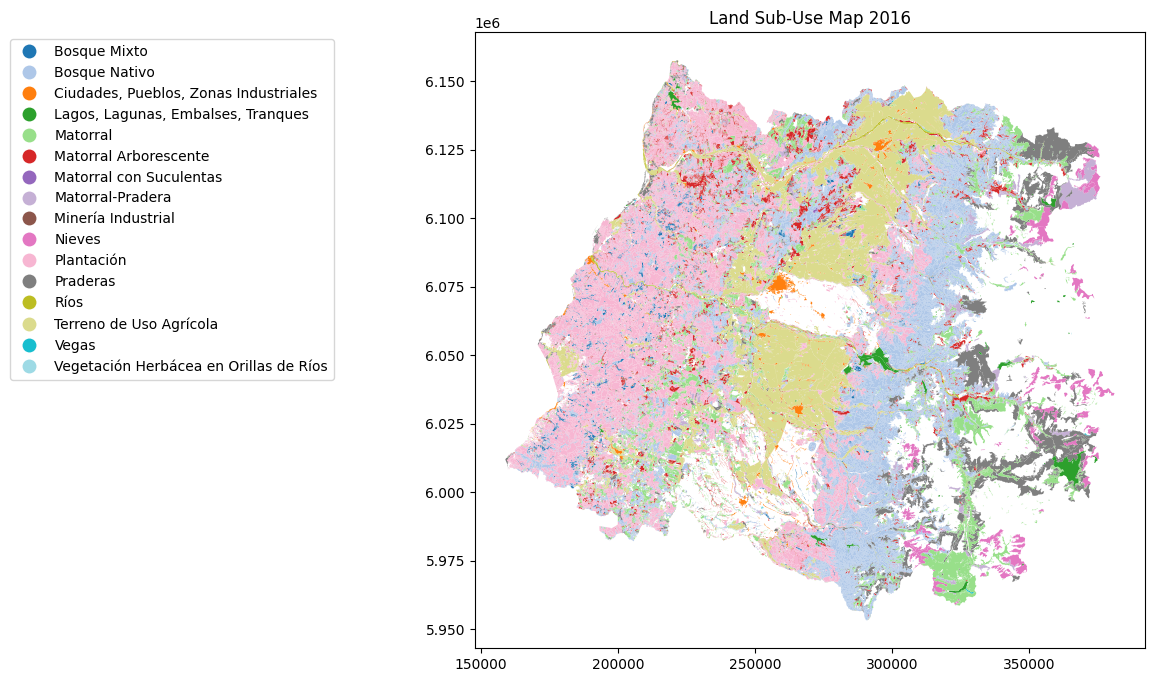

In [33]:
import matplotlib.pyplot as plt
# Filter the dataset
selected_subuso = [
    'Plantación', 'Bosque Nativo', 'Bosque Mixto', 'Terreno de Uso Agrícola', 
    'Matorral', 'Praderas', 'Afloramientos Rocosos', 'Matorral Arborescente', 
    'Matorral-Pradera', 'Nieves', 'Ciudades, Pueblos, Zonas Industriales', 
    'Lagos, Lagunas, Embalses, Tranques', 'Ríos'
]
gdf_filtered = gdf[gdf['SUBUSO'].isin(selected_subuso)]

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))
#gdf_filtered.plot(column='SUBUSO', cmap='tab20', legend=True, ax=ax)
gdf.plot(column='SUBUSO', cmap='tab20', legend=True, ax=ax)

# Adjust legend position to the left
leg = ax.get_legend()
leg.set_bbox_to_anchor((-0.2, 1))  # Moves the legend outside the plot to the left

# Add title
plt.title("Land Sub-Use Map 2016")

plt.show()

In [65]:
gdf.to_file("cleaned_shapefile.shp")

In [9]:
gdf_forest = gdf[(gdf['USO']=='Bosques')]

gdf_forest[['ID','USO','SUBUSO','ESPECI1_CO','ESPECI2_CO','ESPECI3_CO','ESPECI4_CO','ESPECI5_CO','ESPECI6_CO','SUPERF_HA',
'geometry']].tail(20)

,ID,USO,SUBUSO,ESPECI1_CO,ESPECI2_CO,ESPECI3_CO,ESPECI4_CO,ESPECI5_CO,ESPECI6_CO,SUPERF_HA,geometry
117134,20535.0,Bosques,Plantación,Aromo,Pino insigne,,,,,2.63,"POLYGON ((264975.923 5983614.145, 264972.462 5..."
117135,20530.0,Bosques,Plantación,Pino insigne,,,,,,2.66,"POLYGON ((260132.414 5983175.308, 260131.578 5..."
117137,20537.0,Bosques,Plantación,Pino insigne,,,,,,81.23,"POLYGON ((260633.079 5983169.326, 260641.373 5..."
117138,20531.0,Bosques,Plantación,Pino insigne,,,,,,37.17,"POLYGON ((262952.803 5983426.233, 263057.502 5..."
117140,20533.0,Bosques,Plantación,Pino insigne,,,,,,1.19,"POLYGON ((260368.306 5983298.627, 260367.065 5..."
117141,20534.0,Bosques,Plantación,Pino insigne,,,,,,2.07,"POLYGON ((266744.749 5983710.889, 266741.887 5..."
117143,20554.0,Bosques,Plantación,Pino insigne,,,,,,3.79,"POLYGON ((262351.542 5983379.130, 262349.183 5..."
117144,20555.0,Bosques,Plantación,Pino insigne,,,,,,2.20,"POLYGON ((264979.498 5983641.090, 264979.709 5..."
117148,20547.0,Bosques,Plantación,Pino insigne,,,,,,5.26,"POLYGON ((260633.079 5983169.326, 260621.863 5..."
117151,20550.0,Bosques,Plantación,Pino insigne,,,,,,10.68,"POLYGON ((262026.467 5983536.069, 262016.946 5..."


In [69]:
gdf_native = gdf_forest[(gdf_forest['SUBUSO']=='Bosque Nativo')]

gdf_native[['ID','USO','SUBUSO','ESPECI1_CO','ESPECI2_CO','ESPECI3_CO','ESPECI4_CO','ESPECI5_CO','ESPECI6_CO','SUPERF_HA',
'geometry']].tail(20)

,ID,USO,SUBUSO,ESPECI1_CO,ESPECI2_CO,ESPECI3_CO,ESPECI4_CO,ESPECI5_CO,ESPECI6_CO,SUPERF_HA,geometry
109054,20355.0,Bosques,Bosque Nativo,Hualo,,,,,,3.38,"POLYGON ((266013.607 5981951.963, 266020.366 5..."
109068,20373.0,Bosques,Bosque Nativo,Roble,Peumo,Maqui,Boldo,,,5.29,"POLYGON ((260059.530 5981929.777, 260057.124 5..."
109073,20377.0,Bosques,Bosque Nativo,Hualo,,,,,,2.75,"POLYGON ((266075.789 5982218.390, 266074.253 5..."
109074,20378.0,Bosques,Bosque Nativo,Roble,Peumo,Maqui,Boldo,,,4.76,"POLYGON ((260753.941 5982036.161, 260757.326 5..."
109092,20393.0,Bosques,Bosque Nativo,Espino,Huingán,Maitén,Madroño,Bollén,Huañil,3.21,"POLYGON ((266684.829 5981676.294, 266663.662 5..."
109108,20411.0,Bosques,Bosque Nativo,Pitra,Patagua,Culén,Sauce mimbre,Canelo,,15.86,"POLYGON ((256327.711 5981873.563, 256340.148 5..."
109112,20413.0,Bosques,Bosque Nativo,Peumo,Boldo,Quila,Canelo,,,4.70,"POLYGON ((263737.398 5982479.062, 263751.171 5..."
109118,20422.0,Bosques,Bosque Nativo,Litre,Colliguay,Romerillo,,,,0.94,"POLYGON ((263759.575 5982519.426, 263758.432 5..."
109122,20423.0,Bosques,Bosque Nativo,Peumo,Boldo,Quila,Canelo,,,3.42,"POLYGON ((263386.163 5982634.352, 263481.134 5..."
109123,20424.0,Bosques,Bosque Nativo,Roble,,,,,,3.53,"POLYGON ((263383.987 5982635.292, 263383.479 5..."


In [86]:
gdf_plantation = gdf_forest[(gdf_forest['SUBUSO']=='Plantación')]

gdf_plantation[['ID','USO','SUBUSO','ESPECI1_CO','ESPECI2_CO','ESPECI3_CO','ESPECI4_CO','ESPECI5_CO','ESPECI6_CO','SUPERF_HA',
'geometry']].tail(20)

,ID,USO,SUBUSO,ESPECI1_CO,ESPECI2_CO,ESPECI3_CO,ESPECI4_CO,ESPECI5_CO,ESPECI6_CO,SUPERF_HA,geometry
109224,20524.0,Bosques,Plantación,Pino insigne,,,,,,2.94,"POLYGON ((262287.131 5983298.096, 262287.070 5..."
109226,20528.0,Bosques,Plantación,Pino insigne,,,,,,1.41,"POLYGON ((260371.673 5983231.025, 260375.384 5..."
109227,20529.0,Bosques,Plantación,Pino insigne,,,,,,3.18,"POLYGON ((260132.414 5983175.308, 260128.069 5..."
109228,20535.0,Bosques,Plantación,Aromo,Pino insigne,,,,,2.63,"POLYGON ((264975.923 5983614.145, 264972.462 5..."
109229,20530.0,Bosques,Plantación,Pino insigne,,,,,,2.66,"POLYGON ((260132.414 5983175.308, 260131.578 5..."
109231,20537.0,Bosques,Plantación,Pino insigne,,,,,,81.23,"POLYGON ((260633.079 5983169.326, 260641.373 5..."
109232,20531.0,Bosques,Plantación,Pino insigne,,,,,,37.17,"POLYGON ((262952.803 5983426.233, 263057.502 5..."
109234,20533.0,Bosques,Plantación,Pino insigne,,,,,,1.19,"POLYGON ((260368.306 5983298.627, 260367.065 5..."
109235,20534.0,Bosques,Plantación,Pino insigne,,,,,,2.07,"POLYGON ((266744.749 5983710.889, 266741.887 5..."
109237,20554.0,Bosques,Plantación,Pino insigne,,,,,,3.79,"POLYGON ((262351.542 5983379.130, 262349.183 5..."


(array([30783.,     0.,     0.,     0.,     0., 37536.,     0.,     0.,
            0.,  2350.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

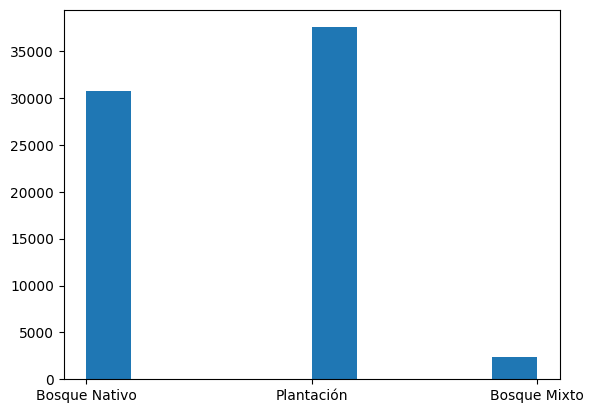

In [75]:
plt.hist(gdf_forest['SUBUSO'])

Text(0.5, 1.0, 'Plantation type')

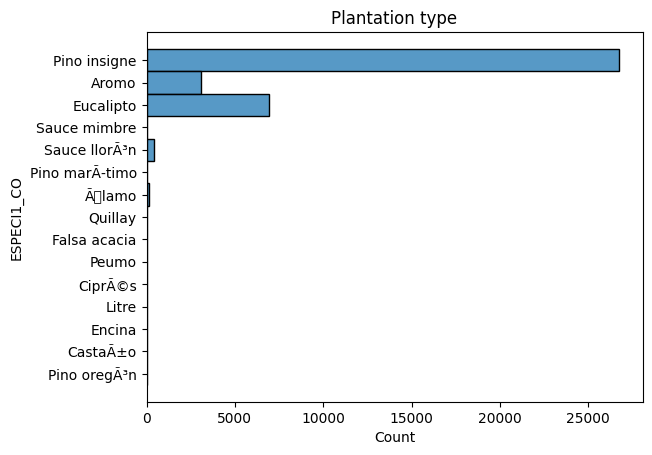

In [84]:
import seaborn as sns
sns.histplot(y=gdf_plantation['ESPECI1_CO'])
plt.title('Plantation type')

Text(0.5, 1.0, 'Plantation type')

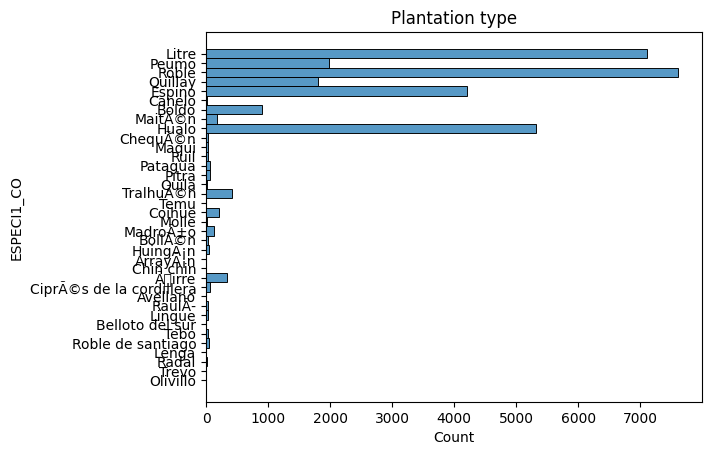

In [85]:
sns.histplot(y=gdf_native['ESPECI1_CO'])
plt.title('Plantation type')

In [87]:
gdf_native['ESPECI1_CO'].value_counts()

ESPECI1_CO
Roble                       7614
Litre                       7105
Hualo                       5321
Espino                      4204
Peumo                       1989
Quillay                     1797
Boldo                        905
TralhuÃ©n                    425
Ãirre                       343
Coihue                       207
MaitÃ©n                      183
MadroÃ±o                     121
Patagua                       66
Pitra                         60
CiprÃ©s de la cordillera      56
HuingÃ¡n                      54
Roble de santiago             43
BollÃ©n                       39
Lingue                        36
RaulÃ­                        33
Ruil                          28
Maqui                         26
ChequÃ©n                      24
Tebo                          24
Canelo                        23
Radal                         17
Quila                         11
Molle                          9
ArrayÃ¡n                       6
Temu                           4

In [45]:
# Convert to raster dataset
import rasterio
from rasterio.features import rasterize
from shapely.geometry import mapping
import numpy as np

# Assume gdf_landuse is your GeoDataFrame containing the polygons

# Step 1: Define the resolution and create a raster grid
resolution = 30  # 30 meters per pixel (Landsat resolution)
# Get bounds of the land use polygons to define the extent of the raster
minx, miny, maxx, maxy = gdf.total_bounds

# Define the raster width and height
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)

# Step 2: Set the CRS and transform polygons to the correct CRS
# Ensure your GeoDataFrame has a CRS and reproject if necessary (e.g., UTM zone)
gdf_landuse = gdf.to_crs(epsg=32619)  # Use UTM for example, adjust EPSG as needed

# Step 3: Create an empty raster
raster = np.zeros((height, width), dtype=np.uint8)

# Step 4: Rasterize the polygons
# We rasterize each polygon based on its ID or some other property from the GeoDataFrame
rasterized = rasterize(
    [(geom, value) for geom, value in zip(gdf_landuse.geometry, gdf_landuse['SUBUSO'])],  # Change 'ID' to desired column
    out_shape=(height, width),
    transform=rasterio.transform.from_origin(minx, maxy, resolution, resolution),
    fill=0,  # Background value
    dtype=np.uint8
)

# Step 5: Save the raster as a GeoTIFF
with rasterio.open(
    'landuse_raster.tif', 'w', 
    driver='GTiff',
    count=1,  # 1 band
    dtype=rasterized.dtype,
    width=width, height=height,
    crs=gdf_landuse.crs,
    transform=rasterio.transform.from_origin(minx, maxy, resolution, resolution)
) as dst:
    dst.write(rasterized, 1)

print("Rasterization complete. Saved as 'landuse_raster.tif'")

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U38'), dtype('<U38')) -> None

In [92]:
# Convert polygon to points using centroid
from sklearn.preprocessing import LabelEncoder
import geojson

label_encoder = LabelEncoder()
gdf['SUBUSO_numeric'] = label_encoder.fit_transform(gdf['SUBUSO'])

# Step 2: Convert polygons to points by taking the centroid of each geometry
gdf['centroid'] = gdf.geometry.centroid


In [94]:
# Step 3: Create GeoJSON feature collection
features = []
for idx, row in gdf.iterrows():
    feature = geojson.Feature(
        geometry=geojson.Point((row['centroid'].x, row['centroid'].y)),
        properties={'SUBUSO': row['SUBUSO_numeric']}
    )
    features.append(feature)

# Step 4: Create the FeatureCollection
feature_collection = geojson.FeatureCollection(features)

# If you want to save it as a GeoJSON file
with open('output_feature_collection.geojson', 'w') as f:
    geojson.dump(feature_collection, f)

In [95]:
subuso_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(subuso_mapping)

{0: 'Bosque Mixto', 1: 'Bosque Nativo', 2: 'Ciudades, Pueblos, Zonas Industriales', 3: 'Lagos, Lagunas, Embalses, Tranques', 4: 'Matorral', 5: 'Matorral Arborescente', 6: 'Matorral con Suculentas', 7: 'Matorral-Pradera', 8: 'Minería Industrial', 9: 'Nieves', 10: 'Plantación', 11: 'Praderas', 12: 'Ríos', 13: 'Terreno de Uso Agrícola', 14: 'Vegas', 15: 'Vegetación Herbácea en Orillas de Ríos'}


In [96]:
gdf = gpd.read_file("output_feature_collection.geojson")

# Save as Shapefile
gdf.to_file("output_shapefile.shp")